# Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/1%20-%20Data%20Clean/yellow_fever_clean.csv'

In [ ]:
dados = pd.read_csv(url, index_col= False)
dados.head()

,ID,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DIA_IS
0,2,N,RR,PACARAIMA,M,19,8,2,1995,1994/1995,NÃO,19
1,3,NE,MA,AMARANTE DO MARANHÃO,M,32,13,4,1995,1994/1995,IGN,1
2,4,NE,MA,AMARANTE DO MARANHÃO,M,33,14,4,1995,1994/1995,SIM,3
3,5,N,PA,CONCEIÇÃO DO ARAGUAIA,M,26,15,4,1995,1994/1995,SIM,12
4,6,N,AM,TAPAUÁ,M,29,4,1,1996,1995/1996,SIM,26


In [ ]:
dados = dados.drop(['ID','MONITORAMENTO_IS']  , axis = 1) # Remove ID

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MACRORREG_LPI  2734 non-null   object
 1   UF_LPI         2734 non-null   object
 2   MUN_LPI        2734 non-null   object
 3   SEXO           2734 non-null   object
 4   IDADE          2734 non-null   int64 
 5   SE_IS          2734 non-null   int64 
 6   MES_IS         2734 non-null   int64 
 7   ANO_IS         2734 non-null   int64 
 8   OBITO          2734 non-null   object
 9   DIA_IS         2734 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 213.7+ KB


# Deaths/Óbitos

Feature "OBITO" is death and also target variable



<Axes: xlabel='OBITO', ylabel='count'>

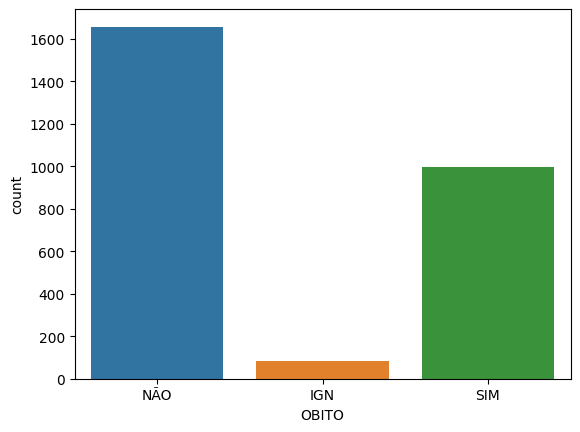

In [ ]:
sns.countplot(x = 'OBITO', data = dados)

In [ ]:
rows = dados['OBITO'] != 'IGN' # "IGN" does not classify death/"IGN" não classifica obito

In [ ]:
dados = dados[rows]

In [ ]:
dados.reset_index(drop=True, inplace=True)

In [ ]:
dados.head()

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,OBITO,DIA_IS
0,N,RR,PACARAIMA,M,19,8,2,1995,NÃO,19
1,NE,MA,AMARANTE DO MARANHÃO,M,33,14,4,1995,SIM,3
2,N,PA,CONCEIÇÃO DO ARAGUAIA,M,26,15,4,1995,SIM,12
3,N,AM,TAPAUÁ,M,29,4,1,1996,SIM,26
4,N,AM,RIO PRETO DA EVA,M,38,4,1,1996,SIM,27


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MACRORREG_LPI  2652 non-null   object
 1   UF_LPI         2652 non-null   object
 2   MUN_LPI        2652 non-null   object
 3   SEXO           2652 non-null   object
 4   IDADE          2652 non-null   int64 
 5   SE_IS          2652 non-null   int64 
 6   MES_IS         2652 non-null   int64 
 7   ANO_IS         2652 non-null   int64 
 8   OBITO          2652 non-null   object
 9   DIA_IS         2652 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 207.3+ KB


<Axes: xlabel='OBITO', ylabel='count'>

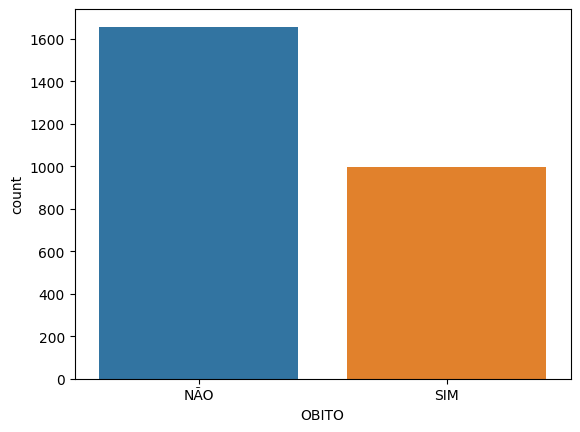

In [ ]:
sns.countplot(x = 'OBITO', data = dados)

<Axes: xlabel='SEXO', ylabel='count'>

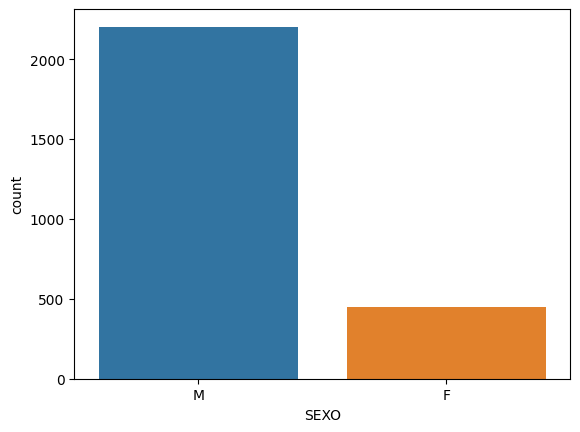

In [ ]:
sns.countplot(x = 'SEXO' , data = dados)

Text(0, 0.5, 'Count/Contagem')

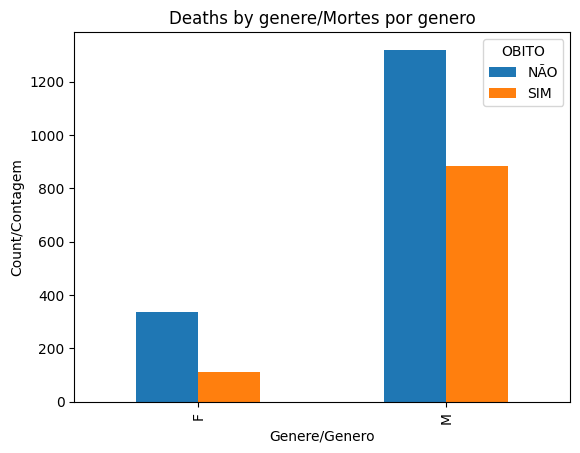

In [ ]:
contagem = dados.groupby(['SEXO','OBITO']).size().unstack(fill_value = 0)

contagem.plot(kind='bar')

plt.title('Deaths by genere/Mortes por genero')
plt.xlabel('Genere/Genero')
plt.ylabel('Count/Contagem')

# Temporal Analysis/Análise temporal

Text(0.5, 1.0, 'Cases by years / Casos por anos')

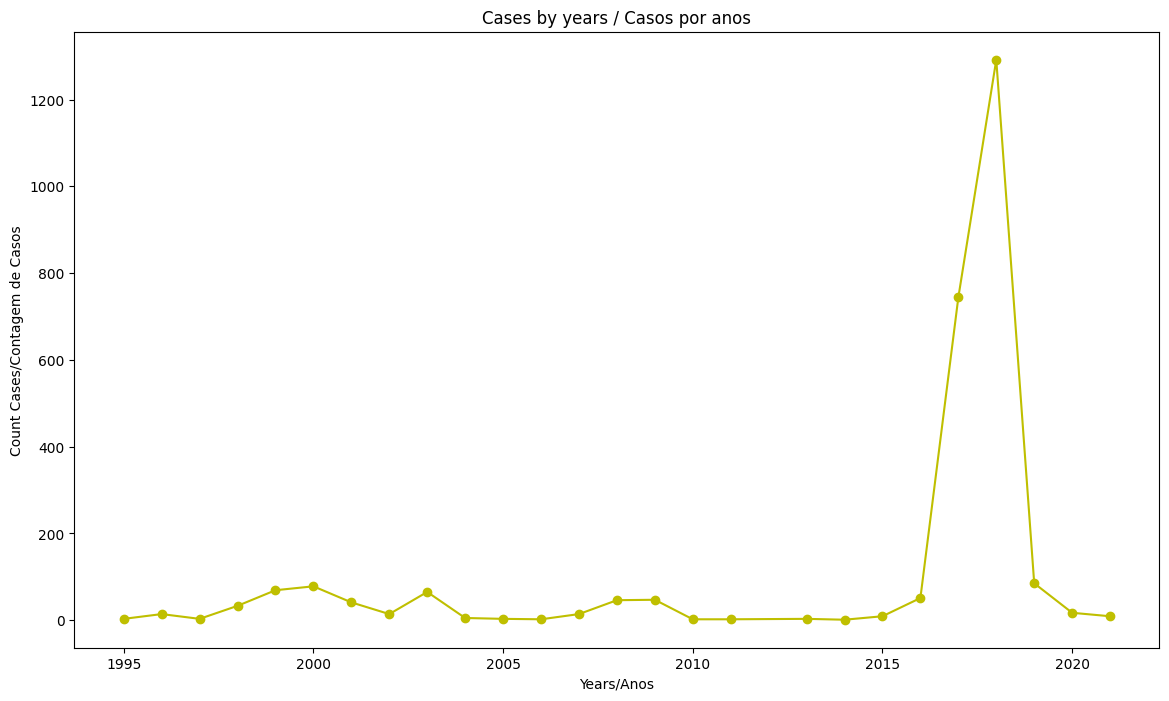

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(dados['ANO_IS'].value_counts().sort_index().index
         , dados['ANO_IS'].value_counts().sort_index().values
         , marker='o'
         , linestyle='-'
         , color='y'
         , label='Contagem por Ano')

plt.xlabel('Years/Anos')
plt.ylabel('Count Cases/Contagem de Casos')
plt.title('Cases by years / Casos por anos')

Text(0, 0.5, 'Count/Contagem')

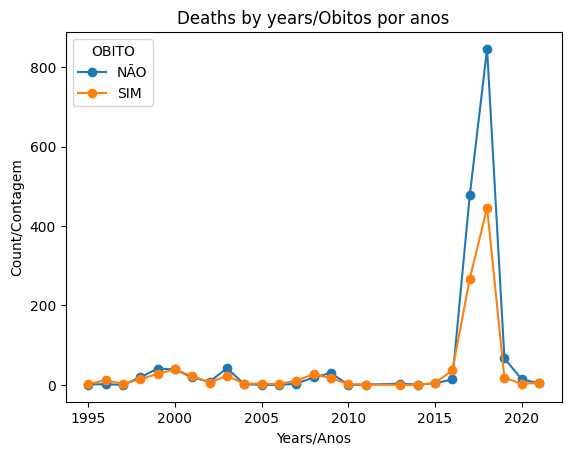

In [ ]:
dados_agrupados = dados.groupby(['ANO_IS','OBITO']).size().unstack(fill_value = 0)

dados_agrupados.plot(kind = 'line', marker = 'o')
plt.title('Deaths by years/Obitos por anos')
plt.xlabel('Years/Anos')
plt.ylabel('Count/Contagem')

Text(0.5, 1.0, 'Cases by months/Casos por mês')

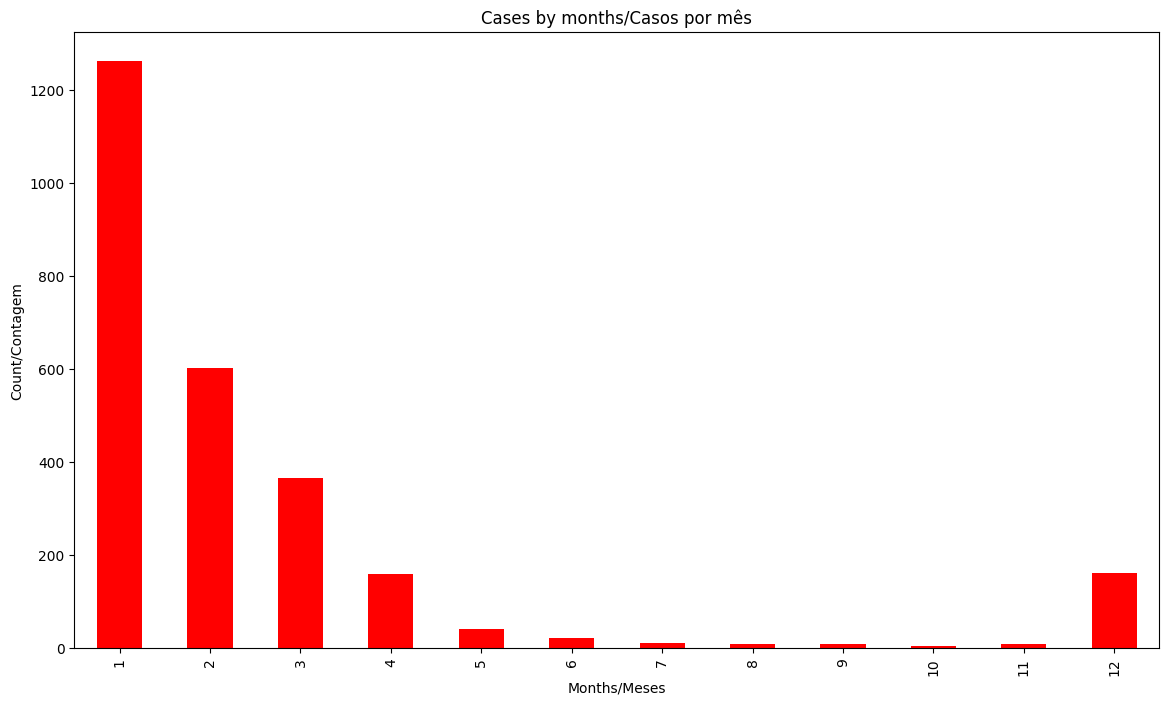

In [ ]:
plt.figure(figsize = (14,8))
dados['MES_IS'].value_counts().sort_index().plot(kind='bar', color = 'red')

plt.xlabel('Months/Meses')
plt.ylabel('Count/Contagem')
plt.title('Cases by months/Casos por mês')

# Analysis by States/ Análise por Estados

<Axes: >

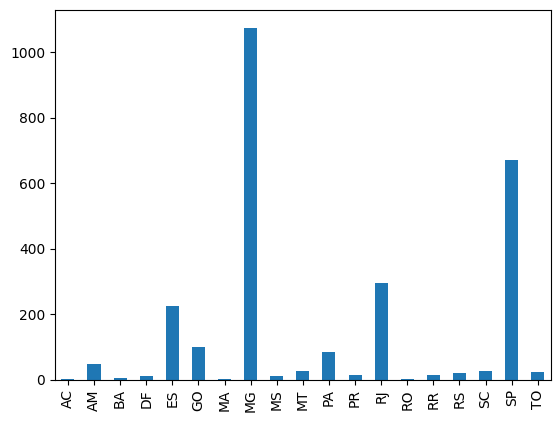

In [ ]:
dados['UF_LPI'].value_counts().sort_index().plot(kind = 'bar')

Text(0, 0.5, 'Deaths/Obitos')

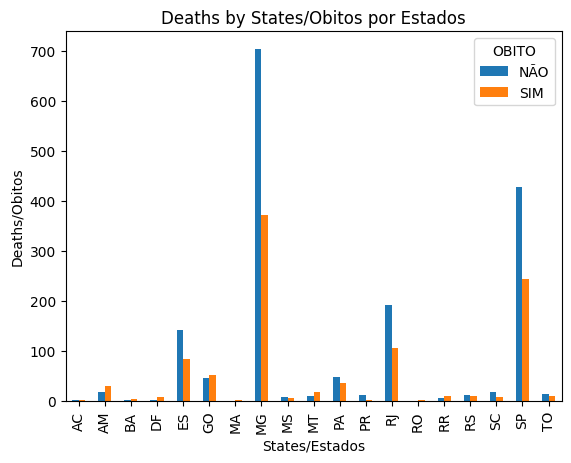

In [ ]:
contagem = dados.groupby(['UF_LPI', 'OBITO']).size().unstack(fill_value=0)

contagem.plot(kind='bar')

plt.title('Deaths by States/Obitos por Estados')
plt.xlabel('States/Estados')
plt.ylabel('Deaths/Obitos')

# Features Numerical/Variaveis Númericas

<Axes: >

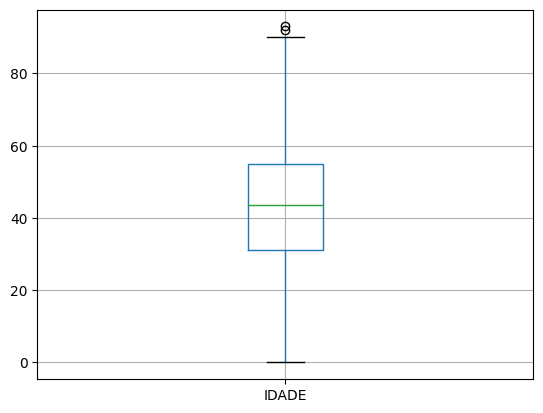

In [ ]:
dados[['IDADE']].boxplot()

<Axes: >

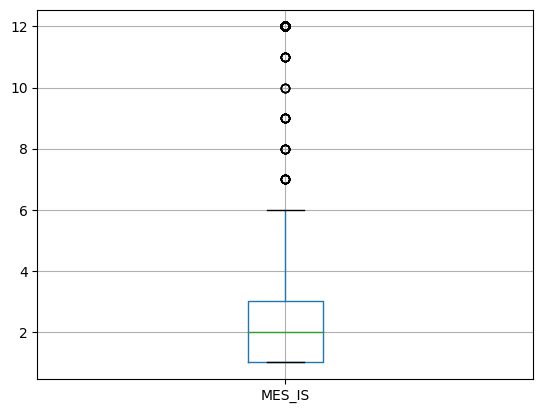

In [ ]:
dados[['MES_IS']].boxplot()

<Axes: >

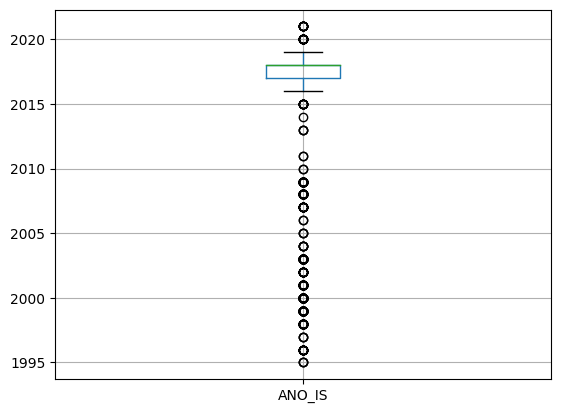

In [ ]:
dados[['ANO_IS']].boxplot()

<Axes: xlabel='ANO_IS', ylabel='IDADE'>

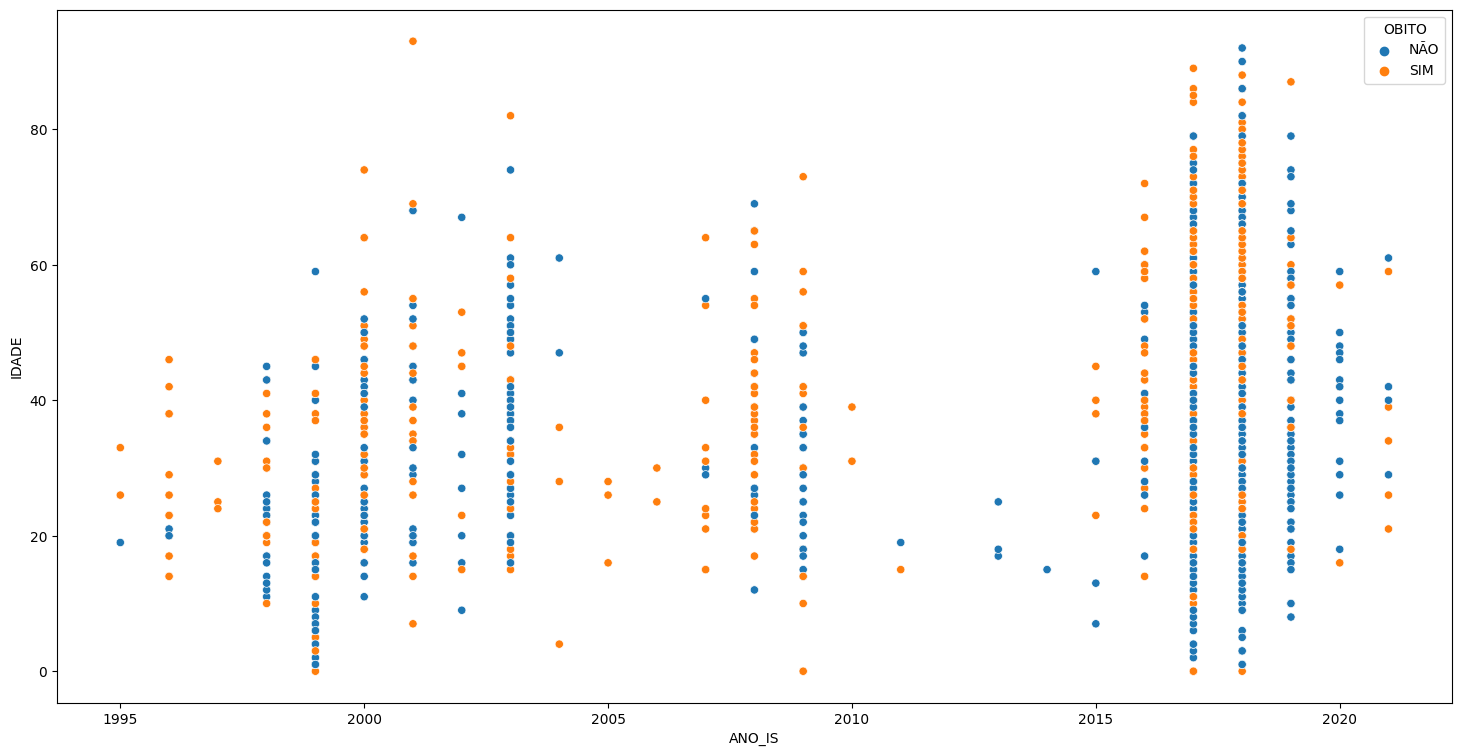

In [ ]:
plt.figure(figsize=(18, 9))
sns.scatterplot(x= 'ANO_IS', y = 'IDADE', hue='OBITO', data = dados)

# Describe

In [ ]:
dados.describe()

,IDADE,SE_IS,MES_IS,ANO_IS,DIA_IS
count,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000
mean,42.779789,9.265460,2.576923,2015.112745,15.166290
std,16.504670,11.859849,2.765670,5.969661,8.371866
min,0.000000,1.000000,1.000000,1995.000000,1.000000
25%,31.000000,3.000000,1.000000,2017.000000,8.000000
50%,43.500000,5.000000,2.000000,2018.000000,15.000000
75%,55.000000,10.000000,3.000000,2018.000000,22.000000
max,93.000000,53.000000,12.000000,2021.000000,31.000000


In [ ]:
dados.var()

<ipython-input-201-d644faea6eeb>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.var()


IDADE     272.404148
SE_IS     140.656023
MES_IS      7.648928
ANO_IS     35.636850
DIA_IS     70.088143
dtype: float64

In [ ]:
dados['OBITO'] = dados['OBITO'].map({'SIM': 1, 'NÃO': 0})
dados.head()

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,OBITO,DIA_IS
0,N,RR,PACARAIMA,M,19,8,2,1995,0,19
1,NE,MA,AMARANTE DO MARANHÃO,M,33,14,4,1995,1,3
2,N,PA,CONCEIÇÃO DO ARAGUAIA,M,26,15,4,1995,1,12
3,N,AM,TAPAUÁ,M,29,4,1,1996,1,26
4,N,AM,RIO PRETO DA EVA,M,38,4,1,1996,1,27


In [ ]:
dados.to_csv('yellow_fever_statistic.csv' ,index = False)